In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cycler import cycler
plt.style.use('fivethirtyeight')

In [9]:
df = pd.read_csv("C:/Users/Fernanda Machado/Pokemon.csv")

In [10]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## COMEÇANDO A ANÁLISE DE DADOS:

In [11]:
df.nlargest(5, 'Total')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


## Esses Pokémons são os mais fortes entre todos os listados, e apesar das muitas diferenças, o que os unem é serem representantes da classe de lendários, os 5 pertencem a essa classe.

In [12]:
df.nsmallest(5, 'Total')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False


## E esses, em contrapartida são os mais fracos, nenhum é lendário.

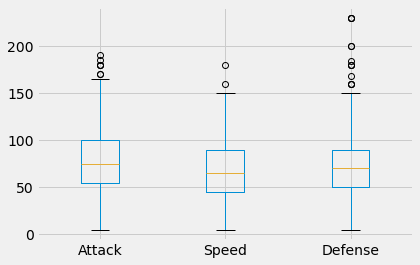

In [13]:
df.boxplot(column=['Attack','Speed','Defense'])
plt.show()

## Boxplots que representa a média de ataque, velocidade e defesa de todos os Pokémons, independente de geração ou tipo.

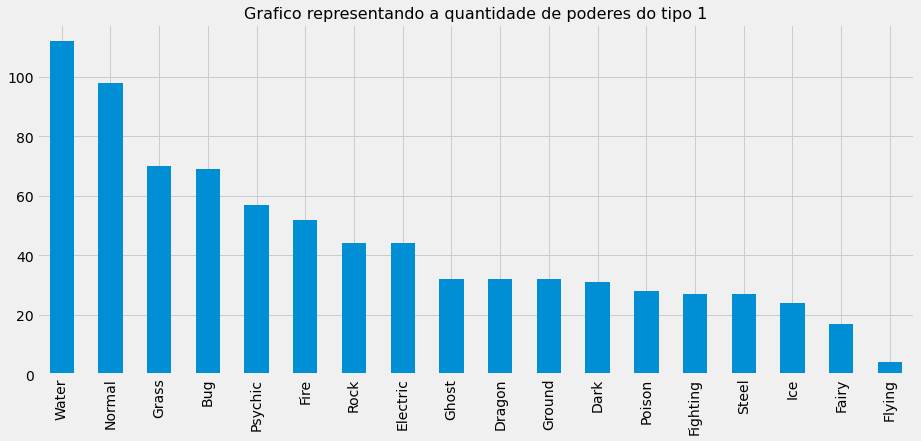

In [14]:
df['Type 1'].value_counts().plot.bar()
plt.title('Grafico representando a quantidade de poderes do tipo 1', size=16)
fig=plt.gcf()  
fig.set_size_inches(14,6)

## Água melhor representada, com mais de 100 Pokémons e Vôo pior representado com menos de 10 Pokémons.

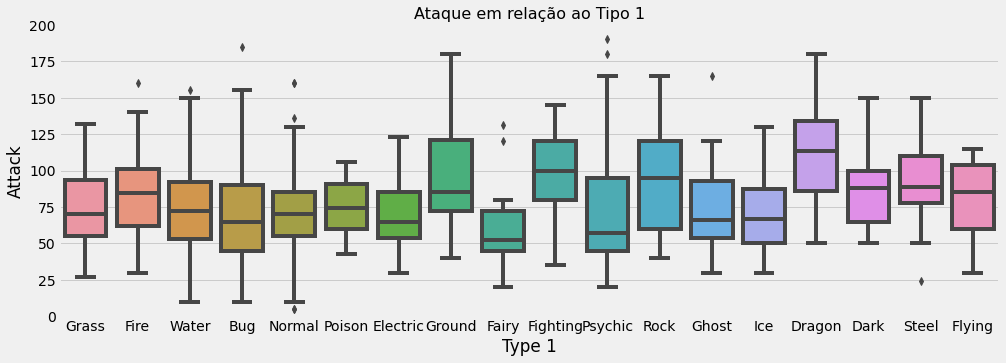

In [15]:
plt.subplots(figsize = (15,5))
plt.title('Ataque em relação ao Tipo 1', size= 16)
sns.boxplot(x = "Type 1", y = "Attack",data = df)
plt.ylim(0,200)
plt.show()

## Com essa análise, ficamos sim muito triste, já que os Pokémons mais fofos demonstraram ser os mais fracos, podem entrar: Pokémons Fairy.
## Em contrapartida, o tipo com a média mais alta são os Dragon, o que não significa que possui o Pokémon mais forte de todos, que sem sombra de dúvidas é do tipo Psychic.

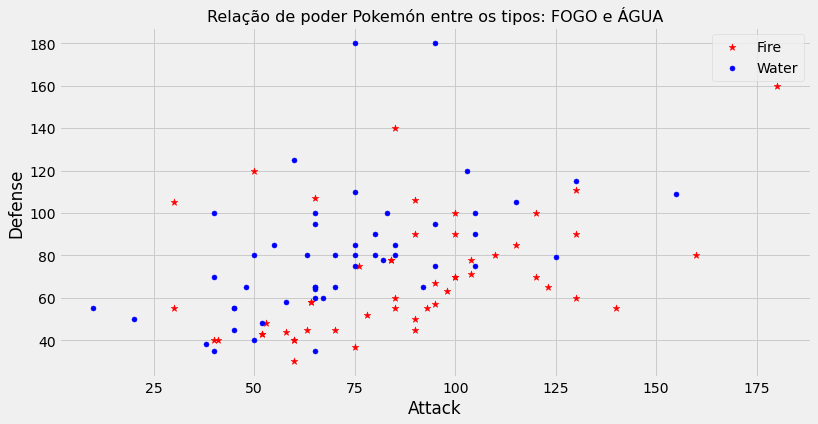

In [16]:
fire=df[(df['Type 1']=='Fire') | ((df['Type 2'])=="Fire")]
water=df[(df['Type 1']=='Water') | ((df['Type 2'])=="Water")]  
plt.scatter(fire.Attack.head(50),fire.Defense.head(50),color= 'red',label='Fire',marker="*",s=50) 
plt.scatter(water.Attack.head(50),water.Defense.head(50),color= 'blue',label="Water",s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
plt.title("Relação de poder Pokemón entre os tipos: FOGO e ÁGUA", size= 16)
fig=plt.gcf()  
fig.set_size_inches(12,6) 
plt.show()

## Analisando o gráfico proposto, é visivel a diferença de poder entre Pokemóns de fogo, e água:
## Pokemóns de fogo, são em sua maioria mais fortes no aspecto ataque, enquanto pokemóns de água possuem a defesa mais aguçada.

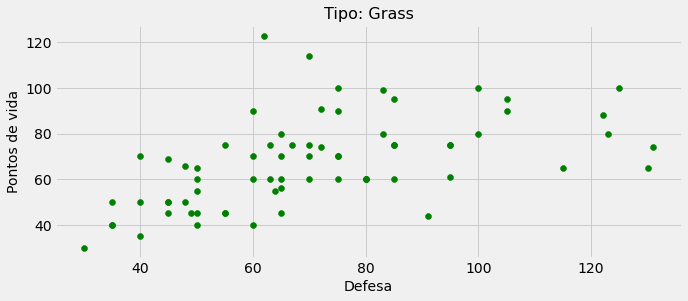

In [17]:
Grama=df.loc[df['Type 1']=='Grass']
a=Grama['Defense']
b=Grama['HP']
plt.scatter(a,b, color='green')

plt.xlabel('Defesa', size=14)
plt.ylabel('Pontos de vida',size=14)
plt.title('Tipo: Grass', size=16)
fig=plt.gcf()  
fig.set_size_inches(10,4)
plt.show()

## Esse gráfico foi escolhido para que os três principais tipos fossem representados, e a representação mostra o quão o tipo "Grama" é forte.

In [44]:
df_stats_legendary = df.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]

<AxesSubplot:xlabel='Legendary,Generation'>

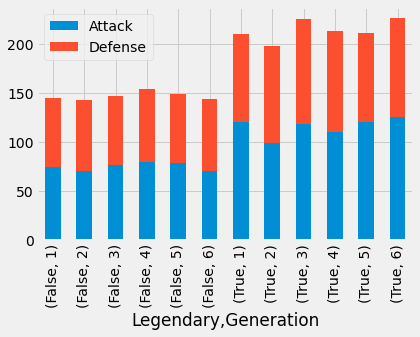

In [46]:
df_stats_legendary.plot.bar(stacked=True)

## Visualização do motivo pelo qual os legendários são legendários. A disparidade de poder entre ambos está clara e objetiva.

## Nessa parte, será feita uma análise de cada geração, comparando cada aspecto dos Pokemons de diferentes gerações.
## A primeira parte do código vai ser selecionar os Pokemons da 1ª a 6ª geração (todas existentes na base de dados) e criar novas tabelas para cada uma delas, o que permitirá que efetuamos nossas comparações adiante.

In [20]:
primeira_geracao = df.loc[df['Generation'] == 1]
segunda_geracao = df.loc[df['Generation'] == 2]
terceira_geracao = df.loc[df['Generation'] == 3]
quarta_geracao = df.loc[df['Generation'] == 4]
quinta_geracao = df.loc[df['Generation'] == 5]
sexta_geracao = df.loc[df['Generation'] == 6]
grupo = ['Primeira', 'Segunda', 'Terceira',
                    'Quarta', 'Quinta', 'Sexta']

## Número de Pokemons por Geração:

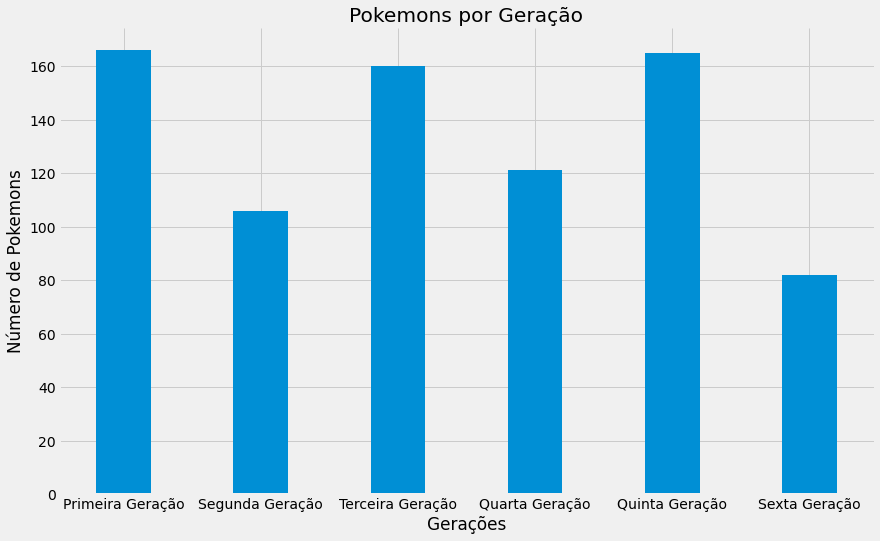

In [21]:
pokemons_por_geracao = [primeira_geracao['#'].count(), segunda_geracao['#'].count(), terceira_geracao['#'].count(),
                        quarta_geracao['#'].count(), quinta_geracao['#'].count(), sexta_geracao['#'].count()]

plt.figure(figsize = (13, 8))
    
X = ['Primeira Geração','Segunda Geração','Terceira Geração','Quarta Geração', 'Quinta Geração', 'Sexta Geração']
numero = pokemons_por_geracao
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, pokemons_por_geracao, 0.4)
  
plt.xticks(X_axis, X)
plt.xlabel("Gerações")
plt.ylabel("Número de Pokemons")
plt.title("Pokemons por Geração")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [22]:
pokemons_por_geracao

[166, 106, 160, 121, 165, 82]

## Como a primeira e a quinta geração aparecem tão próximas no gráfico, acima imprimi a nossa lista para vermos o número exato de Pokemons por geração. A ordem, como podemos perceber é: primeira > quinta > terceira > quarta > segunda > sexta.

## Agora iremos definir médias e contagens de cada aspecto por geração (Tipo 1; Tipo2; Total; HP; Ataque; Defesa; Ataque Especial; Defesa Especial; Velocidade e Lendário ou não)

In [23]:
primeira_geracao_speed = primeira_geracao['Speed'].mean()
segunda_geracao_speed = segunda_geracao['Speed'].mean()
terceira_geracao_speed = terceira_geracao['Speed'].mean()
quarta_geracao_speed = quarta_geracao['Speed'].mean()
quinta_geracao_speed = quinta_geracao['Speed'].mean()
sexta_geracao_speed = sexta_geracao['Speed'].mean()
speed = [primeira_geracao_speed, segunda_geracao_speed, terceira_geracao_speed,
             quarta_geracao_speed, quinta_geracao_speed, sexta_geracao_speed]

In [24]:
primeira_geracao_total = primeira_geracao['Total'].mean()
segunda_geracao_total = segunda_geracao['Total'].mean()
terceira_geracao_total = terceira_geracao['Total'].mean()
quarta_geracao_total = quarta_geracao['Total'].mean()
quinta_geracao_total = quinta_geracao['Total'].mean()
sexta_geracao_total = sexta_geracao['Total'].mean()
total = [primeira_geracao_total, segunda_geracao_total, terceira_geracao_total,
             quarta_geracao_total, quinta_geracao_total, sexta_geracao_total]

In [25]:
primeira_geracao_hp = primeira_geracao['HP'].mean()
segunda_geracao_hp = segunda_geracao['HP'].mean()
terceira_geracao_hp = terceira_geracao['HP'].mean()
quarta_geracao_hp = quarta_geracao['HP'].mean()
quinta_geracao_hp = quinta_geracao['HP'].mean()
sexta_geracao_hp = sexta_geracao['HP'].mean()
hp = [primeira_geracao_hp, segunda_geracao_hp, terceira_geracao_hp,
             quarta_geracao_hp, quinta_geracao_hp, sexta_geracao_hp]

In [26]:
primeira_geracao_attack = primeira_geracao['Attack'].mean()
segunda_geracao_attack = segunda_geracao['Attack'].mean()
terceira_geracao_attack = terceira_geracao['Attack'].mean()
quarta_geracao_attack = quarta_geracao['Attack'].mean()
quinta_geracao_attack = quinta_geracao['Attack'].mean()
sexta_geracao_attack = sexta_geracao['Attack'].mean()
attack = [primeira_geracao_attack, segunda_geracao_attack, terceira_geracao_attack,
             quarta_geracao_attack, quinta_geracao_attack, sexta_geracao_attack]

In [27]:
primeira_geracao_defense = primeira_geracao['Defense'].mean()
segunda_geracao_defense = segunda_geracao['Defense'].mean()
terceira_geracao_defense = terceira_geracao['Defense'].mean()
quarta_geracao_defense = quarta_geracao['Defense'].mean()
quinta_geracao_defense = quinta_geracao['Defense'].mean()
sexta_geracao_defense = sexta_geracao['Defense'].mean()
defense = [primeira_geracao_defense, segunda_geracao_defense, terceira_geracao_defense,
             quarta_geracao_defense, quinta_geracao_defense, sexta_geracao_defense]

In [28]:
primeira_geracao_sp_atk = primeira_geracao['Sp. Atk'].mean()
segunda_geracao_sp_atk = segunda_geracao['Sp. Atk'].mean()
terceira_geracao_sp_atk = terceira_geracao['Sp. Atk'].mean()
quarta_geracao_sp_atk = quarta_geracao['Sp. Atk'].mean()
quinta_geracao_sp_atk = quinta_geracao['Sp. Atk'].mean()
sexta_geracao_sp_atk = sexta_geracao['Sp. Atk'].mean()
sp_atk = [primeira_geracao_sp_atk, segunda_geracao_sp_atk, terceira_geracao_sp_atk,
             quarta_geracao_sp_atk, quinta_geracao_sp_atk, sexta_geracao_sp_atk]

In [29]:
primeira_geracao_sp_def = primeira_geracao['Sp. Def'].mean()
segunda_geracao_sp_def = segunda_geracao['Sp. Def'].mean()
terceira_geracao_sp_def = terceira_geracao['Sp. Def'].mean()
quarta_geracao_sp_def = quarta_geracao['Sp. Def'].mean()
quinta_geracao_sp_def = quinta_geracao['Sp. Def'].mean()
sexta_geracao_sp_def = sexta_geracao['Sp. Def'].mean()
sp_def = [primeira_geracao_sp_def, segunda_geracao_sp_def, terceira_geracao_sp_def,
             quarta_geracao_sp_def, quinta_geracao_sp_def, sexta_geracao_sp_def]

In [30]:
primeira_geracao_type_1 = primeira_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
segunda_geracao_type_1 = segunda_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
terceira_geracao_type_1 = terceira_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
quarta_geracao_type_1 = quarta_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
quinta_geracao_type_1 = quinta_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
sexta_geracao_type_1 = sexta_geracao.groupby('Type 1', as_index = False).agg({'#' : 'count'})
type_1 = [primeira_geracao_type_1, segunda_geracao_type_1, terceira_geracao_type_1,
             quarta_geracao_type_1, quinta_geracao_type_1, sexta_geracao_type_1]

In [31]:
primeira_geracao_type_2 = primeira_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
segunda_geracao_type_2 = segunda_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
terceira_geracao_type_2 = terceira_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
quarta_geracao_type_2 = quarta_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
quinta_geracao_type_2 = quinta_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
sexta_geracao_type_2 = sexta_geracao.groupby('Type 2', as_index = False).agg({'#' : 'count'})
type_2 = [primeira_geracao_type_2, segunda_geracao_type_2, terceira_geracao_type_2,
             quarta_geracao_type_2, quinta_geracao_type_2, sexta_geracao_type_2]

In [32]:
primeira_geracao_lendario = primeira_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
segunda_geracao_lendario = segunda_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
terceira_geracao_lendario = terceira_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
quarta_geracao_lendario = quarta_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
quinta_geracao_lendario = quinta_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
sexta_geracao_lendario = sexta_geracao.groupby('Legendary', as_index = False).agg({'#' : 'count'})
lendario = [primeira_geracao_lendario, segunda_geracao_lendario, terceira_geracao_lendario,
             quarta_geracao_lendario, quinta_geracao_lendario, sexta_geracao_lendario]

## Partindo propriamente para as análises:

## Sendo variáveis numéricas, mas não contínuas, o gráfico de barras é o ideal, pois nos dá o visual lado a lado de cada geração, facilitando a comparação.
## Portanto, abaixo plotamos gráficos para velocidade, total, hp, ataque, defesa, ataque especial e defesa especial.

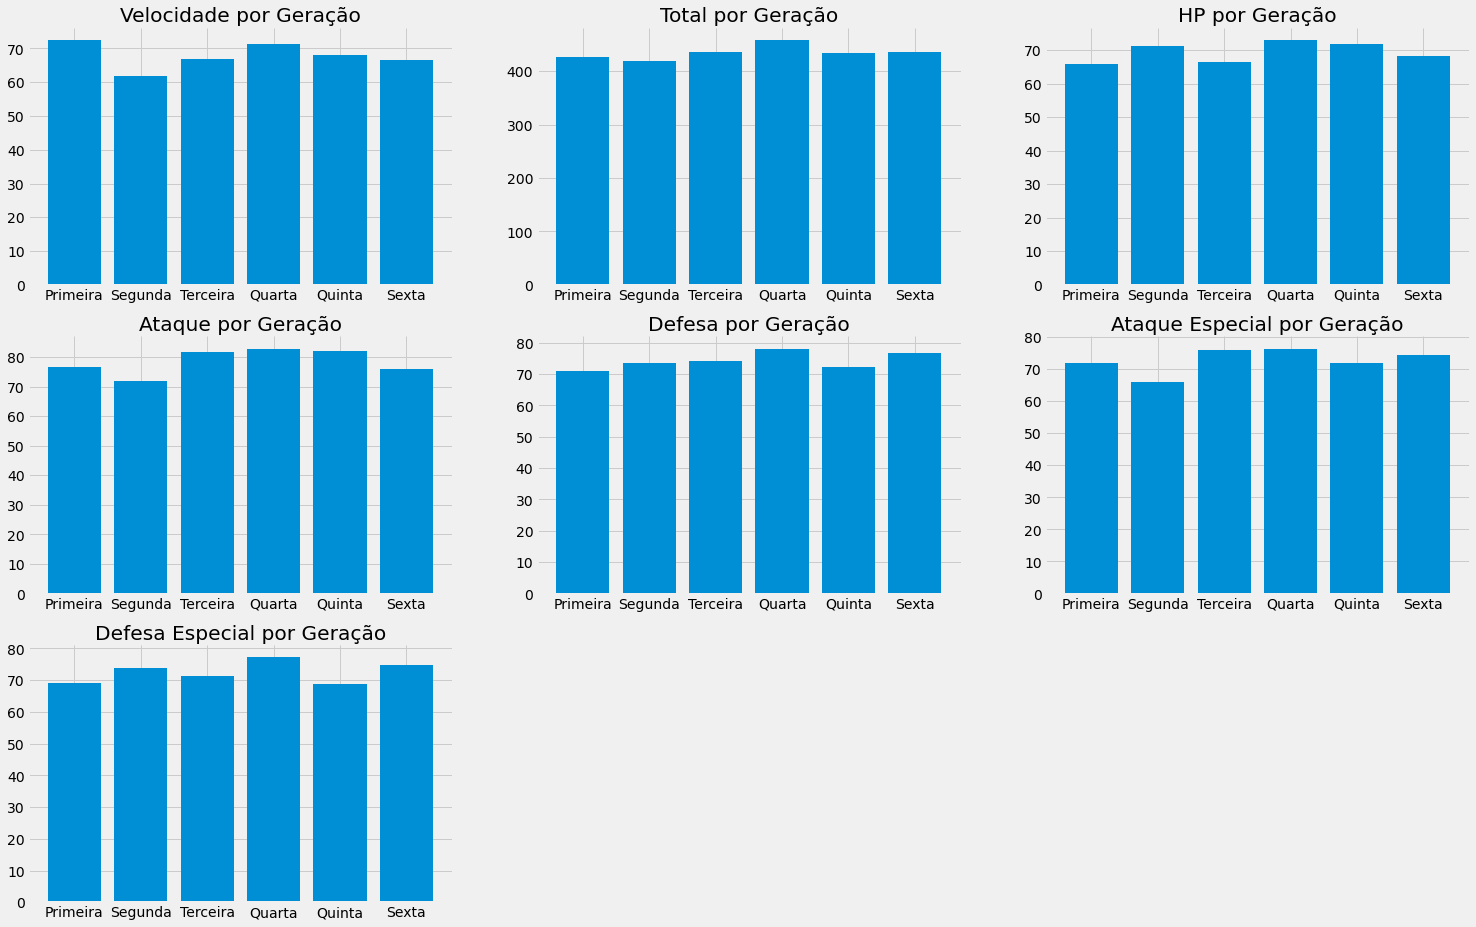

In [33]:
plt.figure(figsize = (23, 15))

plt.subplot(3, 3, 1)
plt.bar(grupo, speed)
plt.title('Velocidade por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 2)
plt.bar(grupo, total)
plt.title('Total por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 3)
plt.bar(grupo, hp)
plt.title('HP por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 4)
plt.bar(grupo, attack)
plt.title('Ataque por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 5)
plt.bar(grupo, defense)
plt.title('Defesa por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 6)
plt.bar(grupo, sp_atk)
plt.title('Ataque Especial por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 3, 7)
plt.bar(grupo, sp_def)
plt.title('Defesa Especial por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## As características parecem ser balanceadas, no sentido de ser randômico se uma é mais forte em um aspecto e outra em outro aspecto. Observaremos de uma forma matematicamente simples se esse é o caso:

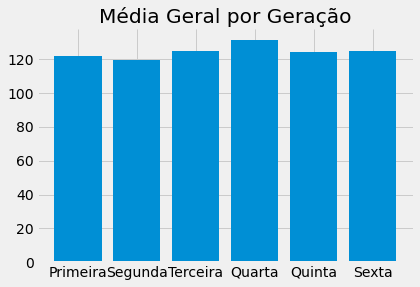

In [34]:
primeira_geracao_geral = (primeira_geracao_attack + primeira_geracao_defense + primeira_geracao_hp +
primeira_geracao_sp_atk + primeira_geracao_sp_def + primeira_geracao_speed + primeira_geracao_total) / 7

segunda_geracao_geral = (segunda_geracao_attack + segunda_geracao_defense + segunda_geracao_hp +
segunda_geracao_sp_atk + segunda_geracao_sp_def + segunda_geracao_speed + segunda_geracao_total) / 7

terceira_geracao_geral = (terceira_geracao_attack + terceira_geracao_defense + terceira_geracao_hp +
terceira_geracao_sp_atk + terceira_geracao_sp_def + terceira_geracao_speed + terceira_geracao_total) / 7

quarta_geracao_geral = (quarta_geracao_attack + quarta_geracao_defense + quarta_geracao_hp +
quarta_geracao_sp_atk + quarta_geracao_sp_def + quarta_geracao_speed + quarta_geracao_total) / 7

quinta_geracao_geral = (quinta_geracao_attack + quinta_geracao_defense + quinta_geracao_hp +
quinta_geracao_sp_atk + quinta_geracao_sp_def + quinta_geracao_speed + quinta_geracao_total) / 7

sexta_geracao_geral = (sexta_geracao_attack + sexta_geracao_defense + sexta_geracao_hp +
sexta_geracao_sp_atk + sexta_geracao_sp_def + sexta_geracao_speed + sexta_geracao_total) / 7

geral = [primeira_geracao_geral, segunda_geracao_geral, terceira_geracao_geral, quarta_geracao_geral, quinta_geracao_geral,
        sexta_geracao_geral]

plt.bar(grupo, geral)
plt.title('Média Geral por Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Com uma simples média de todos os valores, podemos perceber uma equiparação entre as gerações, com a quarta tendo uma leve vantagem em relação às outras, mas nada que possa nos dar a condição de falar que esta é mais forte necessariamente que as outras.

In [35]:
primeira_geracao_type_1['Porcentagem'] = primeira_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100
segunda_geracao_type_1['Porcentagem'] = segunda_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100
terceira_geracao_type_1['Porcentagem'] = terceira_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100
quarta_geracao_type_1['Porcentagem'] = quarta_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100
quinta_geracao_type_1['Porcentagem'] = quinta_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100
sexta_geracao_type_1['Porcentagem'] = sexta_geracao_type_1['#'] / sum(primeira_geracao_type_1['#']) * 100

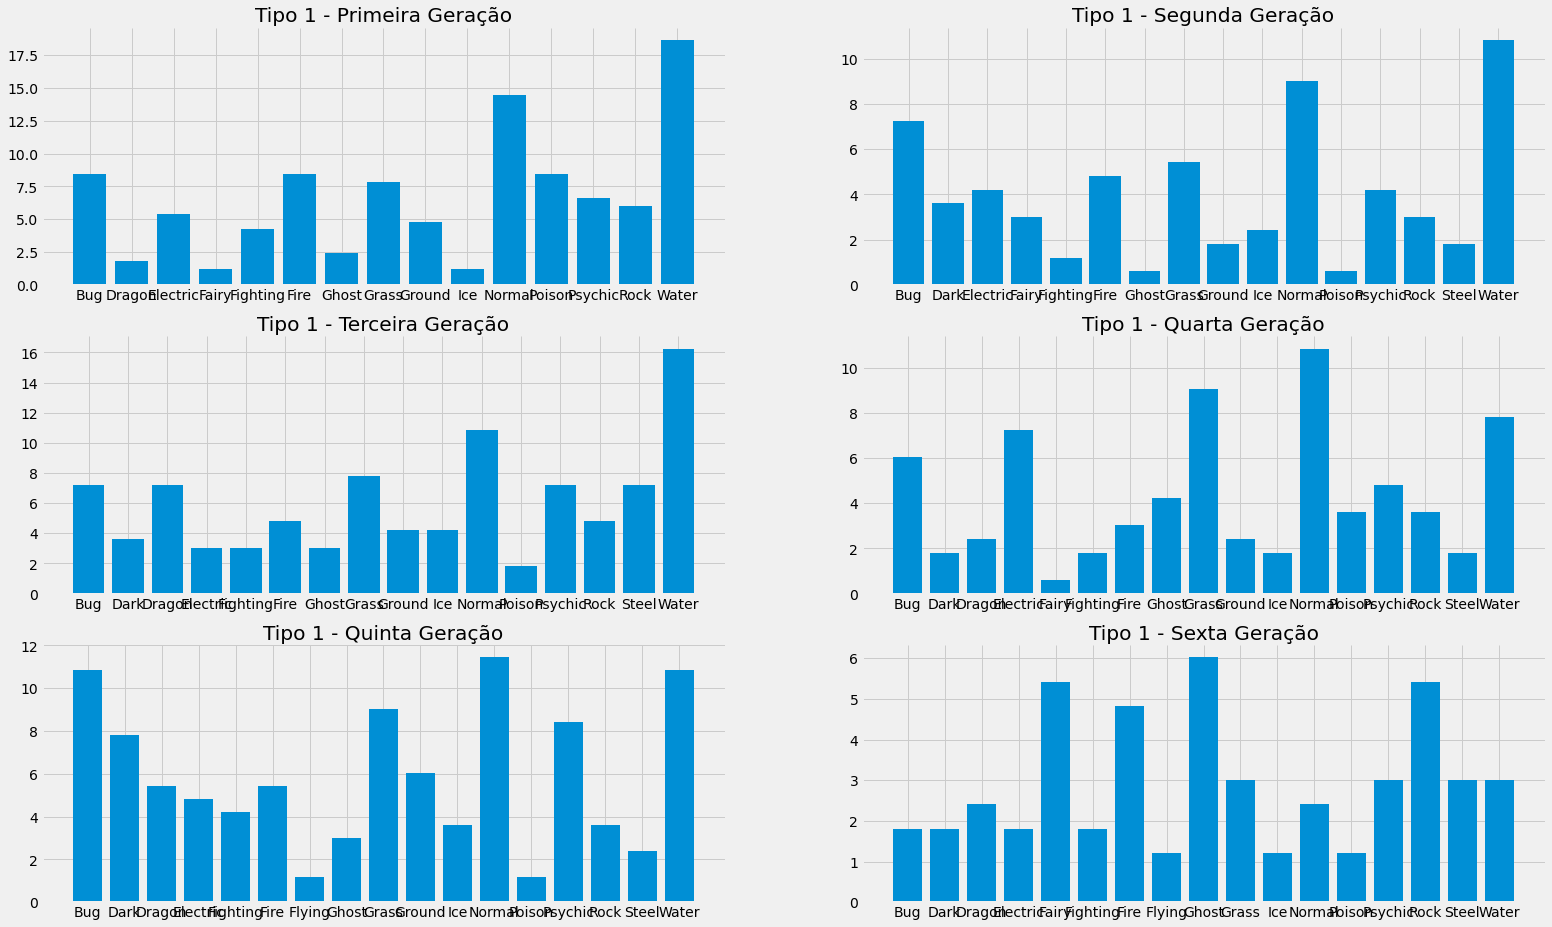

In [36]:
plt.figure(figsize = (24, 15))

plt.subplot(3, 2, 1)
plt.bar(primeira_geracao_type_1['Type 1'], primeira_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Primeira Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 2)
plt.bar(segunda_geracao_type_1['Type 1'], segunda_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Segunda Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 3)
plt.bar(terceira_geracao_type_1['Type 1'], terceira_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Terceira Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 4)
plt.bar(quarta_geracao_type_1['Type 1'], quarta_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Quarta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 5)
plt.bar(quinta_geracao_type_1['Type 1'], quinta_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Quinta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 6)
plt.bar(sexta_geracao_type_1['Type 1'], sexta_geracao_type_1['Porcentagem'])
plt.title('Tipo 1 - Sexta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Como são muitos tipos e casos em que em uma geração existe um determinado tipo que não aparece em outra, essa é uma naálise comparativa que demanda mais atenção, olhando para cada um dos gráficos e observando as porcentagens. 
## Uma observação que pode ser feita é que os tipos normal e água são, geralmente, os mais presentes em todas as gerações, o que explica o observado acima de que são os tipos com maior número de Pokemons.

In [37]:
primeira_geracao_type_2['Porcentagem'] = primeira_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100
segunda_geracao_type_2['Porcentagem'] = segunda_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100
terceira_geracao_type_2['Porcentagem'] = terceira_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100
quarta_geracao_type_2['Porcentagem'] = quarta_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100
quinta_geracao_type_2['Porcentagem'] = quinta_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100
sexta_geracao_type_2['Porcentagem'] = sexta_geracao_type_2['#'] / sum(primeira_geracao_type_2['#']) * 100

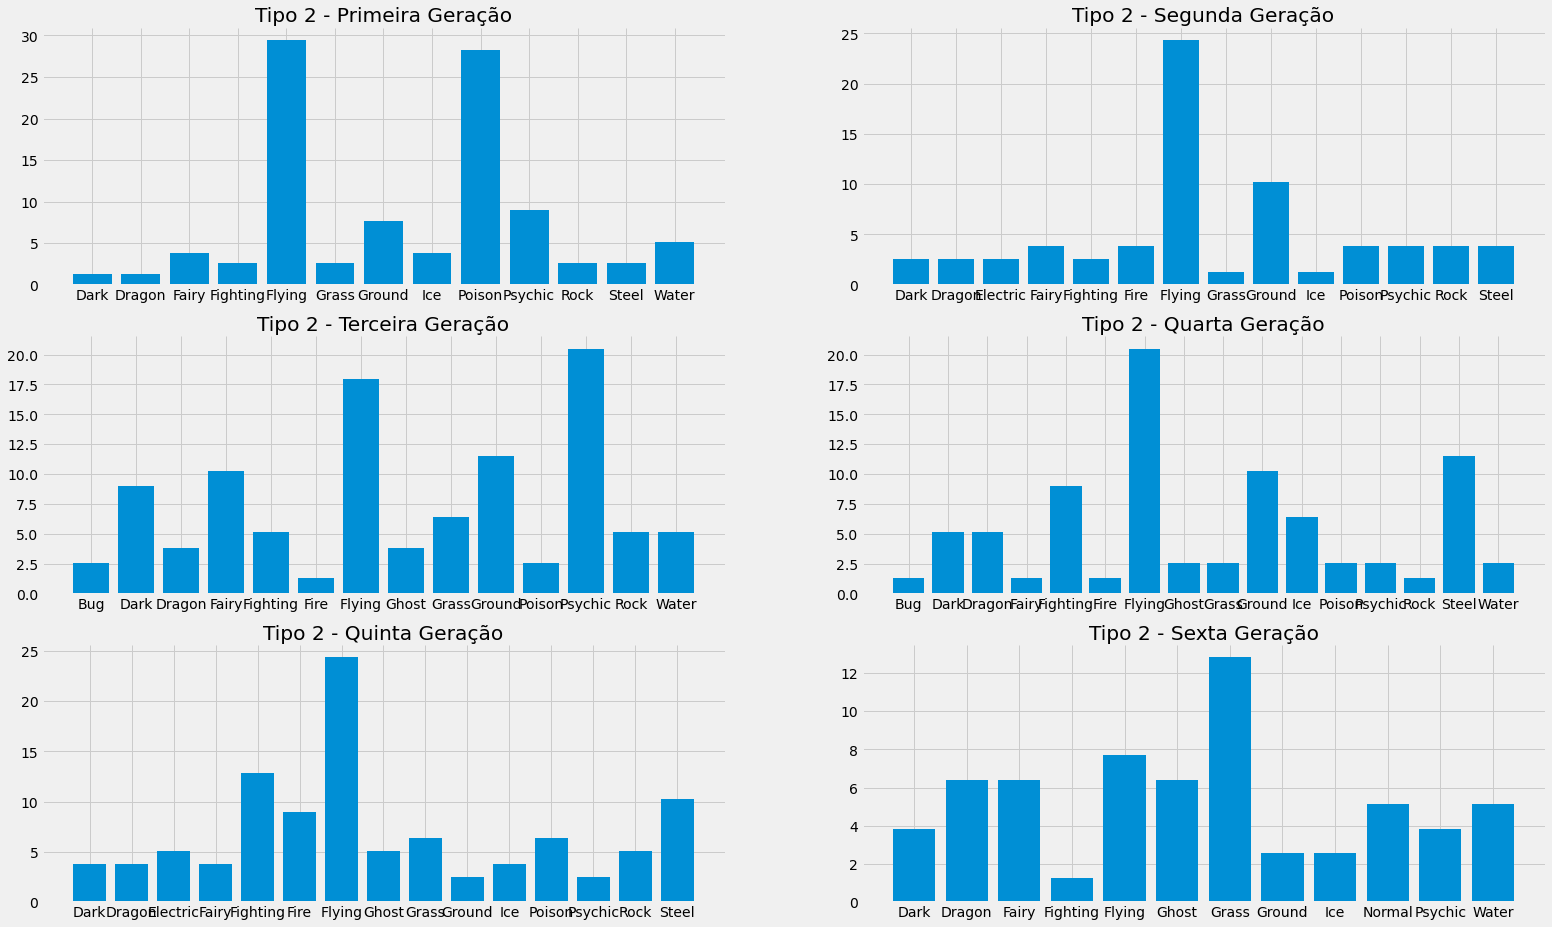

In [38]:
plt.figure(figsize = (24, 15))

plt.subplot(3, 2, 1)
plt.bar(primeira_geracao_type_2['Type 2'], primeira_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Primeira Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 2)
plt.bar(segunda_geracao_type_2['Type 2'], segunda_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Segunda Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 3)
plt.bar(terceira_geracao_type_2['Type 2'], terceira_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Terceira Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 4)
plt.bar(quarta_geracao_type_2['Type 2'], quarta_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Quarta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 5)
plt.bar(quinta_geracao_type_2['Type 2'], quinta_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Quinta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(3, 2, 6)
plt.bar(sexta_geracao_type_2['Type 2'], sexta_geracao_type_2['Porcentagem'])
plt.title('Tipo 2 - Sexta Geração')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Aqui no Tipo 2 já percebemos outro cenário. O tipo voador é o mais presente em basicamente todas as gerações, com outros tipos variados se destacando em cada uma delas (inclusive com o tipo de grama ultrapassando o voador na sexta geração).

## Agora vamos ver a quantidade de lendário por geração:

## Abaixo um print apenas para descobrir os números e facilitar o trabalho postreior.

In [39]:
lendario

[   Legendary    #
 0      False  160
 1       True    6,
    Legendary    #
 0      False  101
 1       True    5,
    Legendary    #
 0      False  142
 1       True   18,
    Legendary    #
 0      False  108
 1       True   13,
    Legendary    #
 0      False  150
 1       True   15,
    Legendary   #
 0      False  74
 1       True   8]

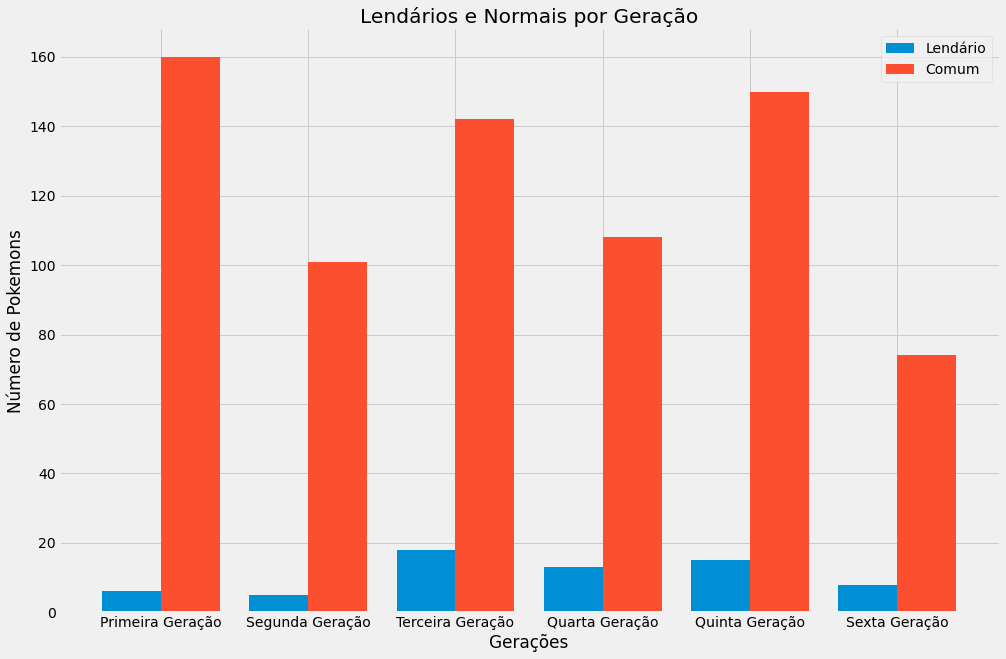

In [40]:
plt.figure(figsize = (15, 10))
    
X = ['Primeira Geração','Segunda Geração','Terceira Geração','Quarta Geração', 'Quinta Geração', 'Sexta Geração']
lend_sim = [6,5,18,13,15,8]
lend_nao = [160,101,142,108,150,74]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, lend_sim, 0.4, label = 'Lendário')
plt.bar(X_axis + 0.2, lend_nao, 0.4, label = 'Comum')
  
plt.xticks(X_axis, X)
plt.xlabel("Gerações")
plt.ylabel("Número de Pokemons")
plt.title("Lendários e Normais por Geração")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

## A maior observação a ser feita nesse gráfico é que, mesmo sendo a geração (junto da quinta) com mais Pokemons, a primeira é uma das que menos possui lendários, mostrando que os criadores decidiram ir adicionando mais lendários nos anos posteriores ao lançamento.

## Com essas análises, podemos explorar diversos conceitos da linguagem Python enquanto descobríamos mais sobre o universo Pokemon, com diversoso números que ilustram a grande diversidade e complexidade do jogo/anime japônes.